In [4]:
import tweepy  
import csv
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [6]:
# initialize a list to hold all the tweepy Tweets
alltweets = []

# make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name="anilkrishna1000", count=100)

# save most recent tweets
alltweets.extend(new_tweets)

# save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

# keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print
    "getting tweets before %s" % (oldest)

    # all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name="anilkrishna1000", count=100, max_id=oldest)

    # save most recent tweets
    alltweets.extend(new_tweets)

    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print
    "...%s tweets downloaded so far" % (len(alltweets))

# transform the tweepy tweets into a 2D array that will populate the csv
outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

In [7]:
# write the csv
with open('%s_tweets.csv' % "anilkrishna1000", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["id", "created_at", "text"])
    writer.writerows(outtweets)

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('anilkrishna1000_tweets.csv')

In [10]:
tweet_df = data
tweet_df.head()

,id,created_at,text
0,1304428232964542466,2020-09-11 14:35:00,b'View my verified achievement from IBM. https...
1,1303298711905120256,2020-09-08 11:46:41,"b""Look, I'm tweeting from #Python in my #Jupyt..."
2,1300809442741583873,2020-09-01 14:55:13,b'View my verified achievement from @IBM. http...
3,1300807926060285954,2020-09-01 14:49:12,b'View my verified achievement from @IBM. http...
4,1288501104523620352,2020-07-29 15:46:17,b'@lucky_sasikanth K thanks for your update...'


In [11]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (24, 3)
Columns are: Index(['id', 'created_at', 'text'], dtype='object')


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          24 non-null     int64 
 1   created_at  24 non-null     object
 2   text        24 non-null     object
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [13]:
df  = pd.DataFrame(tweet_df[['id', 'text']])

In [14]:
import matplotlib.pyplot as plt

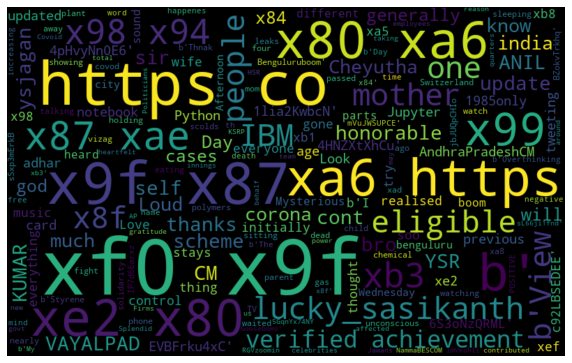

In [15]:
all_words = ' '.join([text for text in df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Removing Twitter Handles (@user)

In [16]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [17]:
import numpy as np

In [18]:
import re

In [19]:
# remove twitter handles (@user)
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [20]:
df.head()

,id,text,tidy_tweet
0,1304428232964542466,b'View my verified achievement from IBM. https...,b'View my verified achievement from IBM. https...
1,1303298711905120256,"b""Look, I'm tweeting from #Python in my #Jupyt...","b""Look, I'm tweeting from #Python in my #Jupyt..."
2,1300809442741583873,b'View my verified achievement from @IBM. http...,b'View my verified achievement from . https://...
3,1300807926060285954,b'View my verified achievement from @IBM. http...,b'View my verified achievement from . https://...
4,1288501104523620352,b'@lucky_sasikanth K thanks for your update...',b' K thanks for your update...'


# Removing Punctuations, Numbers, and Special Characters

In [21]:
# remove special characters, numbers, punctuations
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

# Removing Short Words

In [22]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [23]:
df.head() # Let’s take another look at the first few rows of the combined dataframe

,id,text,tidy_tweet
0,1304428232964542466,b'View my verified achievement from IBM. https...,View verified achievement from https HNZXtXhCu
1,1303298711905120256,"b""Look, I'm tweeting from #Python in my #Jupyt...",Look tweeting from #Python #Jupyter notebook
2,1300809442741583873,b'View my verified achievement from @IBM. http...,View verified achievement from https KwbcN
3,1300807926060285954,b'View my verified achievement from @IBM. http...,View verified achievement from https EVBFrku
4,1288501104523620352,b'@lucky_sasikanth K thanks for your update...',thanks your update


# Tokenization

In [24]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [View, verified, achievement, from, https, HNZ...
1    [Look, tweeting, from, #Python, #Jupyter, note...
2    [View, verified, achievement, from, https, KwbcN]
3    [View, verified, achievement, from, https, EVB...
4                               [thanks, your, update]
Name: tidy_tweet, dtype: object

# Stemming

In [25]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0     [view, verifi, achiev, from, http, hnzxtxhcu]
1    [look, tweet, from, #python, #jupyt, notebook]
2         [view, verifi, achiev, from, http, kwbcn]
3       [view, verifi, achiev, from, http, evbfrku]
4                              [thank, your, updat]
Name: tidy_tweet, dtype: object

In [26]:
df.head()

,id,text,tidy_tweet
0,1304428232964542466,b'View my verified achievement from IBM. https...,View verified achievement from https HNZXtXhCu
1,1303298711905120256,"b""Look, I'm tweeting from #Python in my #Jupyt...",Look tweeting from #Python #Jupyter notebook
2,1300809442741583873,b'View my verified achievement from @IBM. http...,View verified achievement from https KwbcN
3,1300807926060285954,b'View my verified achievement from @IBM. http...,View verified achievement from https EVBFrku
4,1288501104523620352,b'@lucky_sasikanth K thanks for your update...',thanks your update


# Understanding the common words used in the tweets: WordCloud

## A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

# Let’s visualize all the words our data using the wordcloud plot.

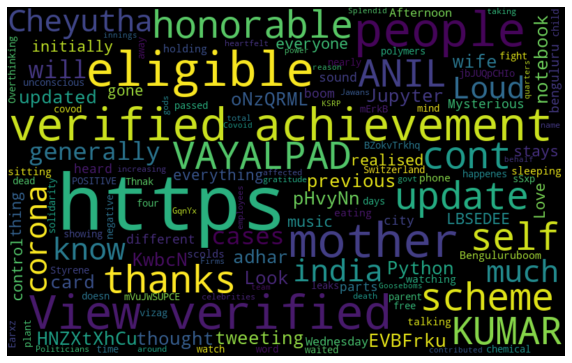

In [27]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
!pip install textblob     


  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl


In [28]:

import textblob          
from textblob import TextBlob

In [29]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tidy_tweet'].apply(getSubjectivity)
df['Polarity'] = df['tidy_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,id,text,tidy_tweet,Subjectivity,Polarity
0,1304428232964542466,b'View my verified achievement from IBM. https...,View verified achievement from https HNZXtXhCu,0.000000,0.000000
1,1303298711905120256,"b""Look, I'm tweeting from #Python in my #Jupyt...",Look tweeting from #Python #Jupyter notebook,0.000000,0.000000
2,1300809442741583873,b'View my verified achievement from @IBM. http...,View verified achievement from https KwbcN,0.000000,0.000000
3,1300807926060285954,b'View my verified achievement from @IBM. http...,View verified achievement from https EVBFrku,0.000000,0.000000
4,1288501104523620352,b'@lucky_sasikanth K thanks for your update...',thanks your update,0.200000,0.200000
5,1288500082057162754,b'@lucky_sasikanth K bro thanks for your updat...,thanks your update,0.200000,0.200000
6,1288450451831062528,b'@lucky_sasikanth In previous adhar card 1985...,previous adhar card only updated have cont eli...,0.583333,-0.083333
7,1288410882431565825,b'@AndhraPradeshCM @ysjagan honorable CM sir ....,honorable self VAYALPAD ANIL KUMAR mother elig...,0.000000,0.000000
8,1288409924947415040,b'@ysjagan honorable CM sir ...my self VAYALPA...,honorable self VAYALPAD ANIL KUMAR mother elig...,0.000000,0.000000
9,1270540208782499842,b'I thought corona is like your wife ... initi...,thought corona like your wife initially contro...,0.000000,0.000000


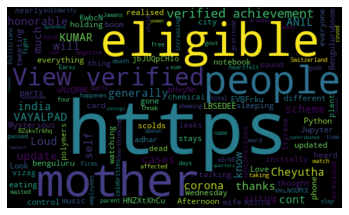

In [30]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['tidy_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,id,text,tidy_tweet,Subjectivity,Polarity,Analysis
0,1304428232964542466,b'View my verified achievement from IBM. https...,View verified achievement from https HNZXtXhCu,0.000000,0.000000,Neutral
1,1303298711905120256,"b""Look, I'm tweeting from #Python in my #Jupyt...",Look tweeting from #Python #Jupyter notebook,0.000000,0.000000,Neutral
2,1300809442741583873,b'View my verified achievement from @IBM. http...,View verified achievement from https KwbcN,0.000000,0.000000,Neutral
3,1300807926060285954,b'View my verified achievement from @IBM. http...,View verified achievement from https EVBFrku,0.000000,0.000000,Neutral
4,1288501104523620352,b'@lucky_sasikanth K thanks for your update...',thanks your update,0.200000,0.200000,Positive
5,1288500082057162754,b'@lucky_sasikanth K bro thanks for your updat...,thanks your update,0.200000,0.200000,Positive
6,1288450451831062528,b'@lucky_sasikanth In previous adhar card 1985...,previous adhar card only updated have cont eli...,0.583333,-0.083333,Negative
7,1288410882431565825,b'@AndhraPradeshCM @ysjagan honorable CM sir ....,honorable self VAYALPAD ANIL KUMAR mother elig...,0.000000,0.000000,Neutral
8,1288409924947415040,b'@ysjagan honorable CM sir ...my self VAYALPA...,honorable self VAYALPAD ANIL KUMAR mother elig...,0.000000,0.000000,Neutral
9,1270540208782499842,b'I thought corona is like your wife ... initi...,thought corona like your wife initially contro...,0.000000,0.000000,Neutral


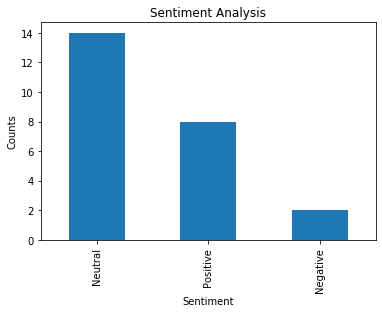

In [32]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()